In [1]:
from cloudmesh.common.Shell import Shell
from cloudmesh.common.util import readfile
import sys
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [72]:
def read_energy(filename=None):
   full_filename = Shell.map_filename(filename).path
   # 1: means removing hashes
   content = readfile(full_filename).splitlines()[1:]
   # removing #
   content[0] = content[0][2:]
   # print(content[0:10])
   content = "\n".join(content)
   content = content.replace(', ', ',')
   df = pd.read_csv(io.StringIO(content),sep=',')
   return df


In [73]:
def export_figure(x='Time/s', y='Energy/W', filename=None):
   plt.xlabel(x)
   plt.ylabel(y)
   base = os.path.dirname(filename.replace('_', '-').lower())
   png = base + ".png"
   pdf = base + ".pdf"
   plt.savefig(png, bbox_inches='tight', dpi=600)
   plt.savefig(pdf, bbox_inches='tight')

In [74]:
def convert_colum_to_seconds(df, name):
    df[[name]] = df[[name]].astype('datetime64[us]')
    start_t = df[[name]].iloc[0]
    print (start_t, type(start_t))
    df[[name]] = df[[name]] - start_t
    df[[name]] = df[[name]].astype(int)/1000000000
    df

ParserError: Unknown string format: 2022-12-21:12:55:22.564333 present at position 0

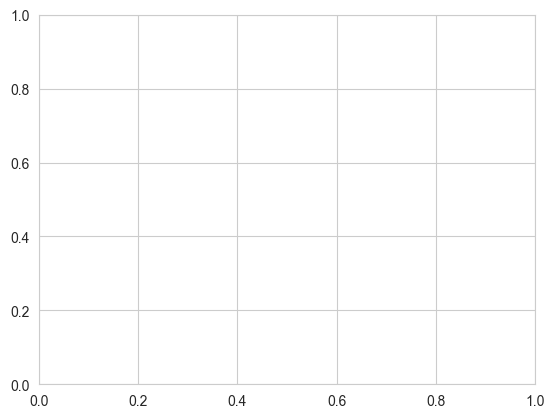

In [75]:
list_of_filenames = [('./data/card_name_a100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_2/gpu0.log', 2),
                     ('./data/card_name_a100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_30/gpu0.log', 30),
                     ('./data/card_name_a100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_70/gpu0.log', 70)]

for filename, epoch in list_of_filenames:
   fig, ax = plt.subplots()
   df = read_energy(filename)
   convert_colum_to_seconds(df, "time")
   label = f'Epoch {epoch}'
   df.rename(columns = {'0 power_draw W':label}, inplace=True)
   energy = df[['time', label]]
   sns.lineplot(energy)
   export_figure(filename=filename)
   plt.show()
   display(df)
   print (type(df[['time']].iloc[0]))

In [5]:
err_dir_path = Shell.map_filename(
    './data/card_name_a100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_2/'
).path
full_dir_path = None

for file in os.listdir(err_dir_path):
   if file.endswith(".err"):
      print(os.path.join(err_dir_path, file))
      full_dir_path = os.path.join(err_dir_path, file)

/home/green/Desktop/github/mlcommons/benchmarks/earthquake/analysis/energy/data/card_name_a100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_2/dje5dj-45737981.err


In [38]:
content = readfile(full_dir_path, encoding='utf-8')
content = content.replace(', ', ',').splitlines()

# headline = '# csv,timer,status,time,sum,start,tag,msg,uname.node,user,uname.system,platform.version'
headline = Shell.cm_grep(content, '# csv,timer')[0]
csv_lines = Shell.cm_grep(content, '# csv')
csv_lines = Shell.cm_grep(csv_lines, 'Linux')
csv_lines.insert(0, headline)
# print("\n".join(csv_lines))
content = "\n".join(csv_lines)
timer_df = pd.read_csv(io.StringIO(content),sep=',')

In [53]:
df2 = timer_df.drop(columns=['# csv', 'status', 'sum', 'uname.node', 'user', 'uname.system', 'platform.version', 'msg'])
df2[["t"]] = df2[["start"]].astype('datetime64')
start_t = df2[["t"]].iloc[0]
print (start_t, type(start_t))
df2[["t"]] = df2[["t"]] - start_t
df2[["t"]] = df2[["t"]].astype(int)/1000000000
df2

# to do- there are two totals. if time == None then drop the row

t   2022-12-21 17:55:33
Name: 0, dtype: datetime64[ns] <class 'pandas.core.series.Series'>


,timer,time,start,tag,t
0,total,None,2022-12-21 17:55:33,TIMER1,0.0
1,total,9876.208,2022-12-21 17:55:33,TIMER2,0.0
2,INIT,2.261,2022-12-21 17:55:48,TIMER2,15.0
3,EVAL,409.961,2022-12-21 17:55:51,TIMER2,18.0
4,PLOTS,385.099,2022-12-21 17:55:51,TIMER2,18.0
...,...,...,...,...,...
224,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-12-21 20:40:06,TIMER2,9873.0
225,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-12-21 20:40:06,TIMER2,9873.0
226,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-12-21 20:40:07,TIMER2,9874.0
227,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-12-21 20:40:07,TIMER2,9874.0


In [16]:
df2.keys()

Index(['timer', 'time', 'start', 'tag'], dtype='object')

In [17]:
df2.loc[df2['timer'] == 'INIT']

,timer,time,start,tag
2,INIT,2.261,2022-12-21 17:55:48,TIMER2


In [18]:
df2.loc[df2['timer'] == 'PLOTTED_EARTHQUAKE_IMAGES']

,timer,time,start,tag
23,PLOTTED_EARTHQUAKE_IMAGES,0.0,2022-12-21 18:02:16,TIMER2


In [19]:
df2.loc[df2['timer'] == 'Predicted_Data_0']

,timer,time,start,tag
24,Predicted_Data_0,0.0,2022-12-21 18:02:54,TIMER2


In [20]:
df2.loc[df2['timer'] == 'Predicted_Data_103']

,timer,time,start,tag
127,Predicted_Data_103,0.0,2022-12-21 18:02:55,TIMER2


In [21]:
df2.loc[df2['timer'] == 'RunTFTCustomVersion tft only']

,timer,time,start,tag
133,RunTFTCustomVersion tft only,0.01,2022-12-21 18:23:07,TIMER2


In [26]:
def plot_energy(filename, epoch):
    df = read_energy(filename)
    label = f'Epoch {epoch}'
    df.rename(columns = {'0 power_draw W':label}, inplace=True)
    energy = df[['time', label]]
    # display(energy)

    ax = sns.lineplot(energy)
    # export_figure('Time', 'Energy', filename)
    return ax

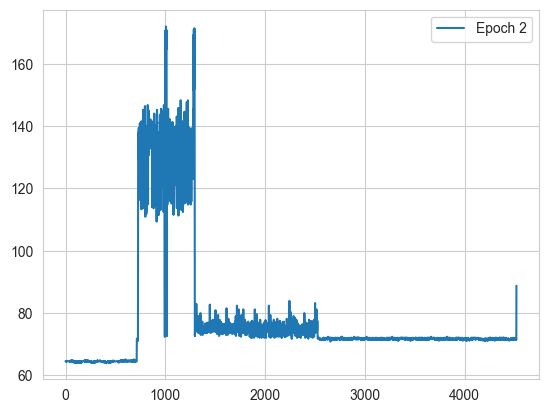

In [27]:
read_energy('./data/card_name_a100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_2/gpu0.log')
ax = plot_energy('./data/card_name_a100_gpu_count_1_cpu_num_6_mem_32GB_repeat_1_TFTTransformerepochs_2/gpu0.log', 2)


In [24]:
df2

,timer,time,start,tag
0,total,None,2022-12-21 17:55:33,TIMER1
1,total,9876.208,2022-12-21 17:55:33,TIMER2
2,INIT,2.261,2022-12-21 17:55:48,TIMER2
3,EVAL,409.961,2022-12-21 17:55:51,TIMER2
4,PLOTS,385.099,2022-12-21 17:55:51,TIMER2
...,...,...,...,...
224,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-12-21 20:40:06,TIMER2
225,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-12-21 20:40:06,TIMER2
226,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-12-21 20:40:07,TIMER2
227,RunTFTCustomVersion DLResults Graph Title even...,0.0,2022-12-21 20:40:07,TIMER2


In [31]:
poi = ['INIT',
       'data head setup',
       'RunTFTCustomVersion A',
       'RunTFTCustomVersion bestfit Epoch:0',
       'RunTFTCustomVersion bestfit finalize',
       'DLprediction Iteration',
       'DLResults_Graphs timer_num:0',
       'RunTFTCustomVersion bestfit finalize VisualizeTFT event_num:0']

for i, row in df2.iterrows():
   label = row['timer']
   if label in poi:
      # print(row['timer'], row['start'])
      x = row['start']
      y = 180
      print(x, type(x), y, type(y), label, type(label))
      #ax.text(x, y, label)
      #ax.plot(x, y)
plt.show()

2022-12-21 17:55:48 <class 'str'> 180 <class 'int'> INIT <class 'str'>
2022-12-21 18:03:00 <class 'str'> 180 <class 'int'> data head setup <class 'str'>
2022-12-21 18:23:08 <class 'str'> 180 <class 'int'> RunTFTCustomVersion A <class 'str'>
2022-12-21 20:35:54 <class 'str'> 180 <class 'int'> DLprediction Iteration <class 'str'>
2022-12-21 20:39:25 <class 'str'> 180 <class 'int'> DLResults_Graphs timer_num:0 <class 'str'>
2022-12-21 20:40:08 <class 'str'> 180 <class 'int'> RunTFTCustomVersion bestfit finalize VisualizeTFT event_num:0 <class 'str'>
